___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [4]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# consistent plot size 
from pylab import rcParams
rcParams['figure.figsize']=12,5

# Load datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

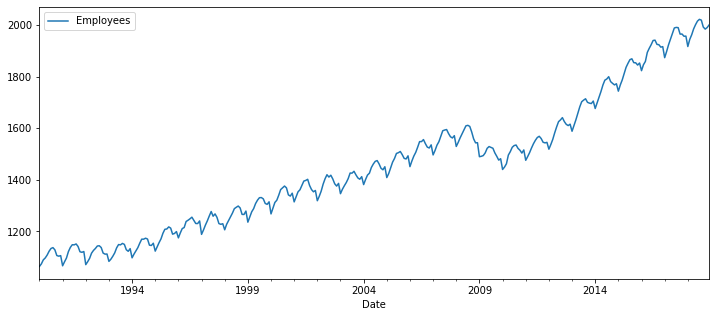

In [5]:
## CODE HERE
df.plot()

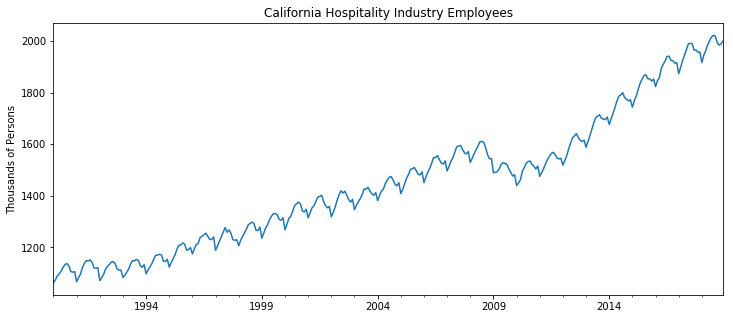

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

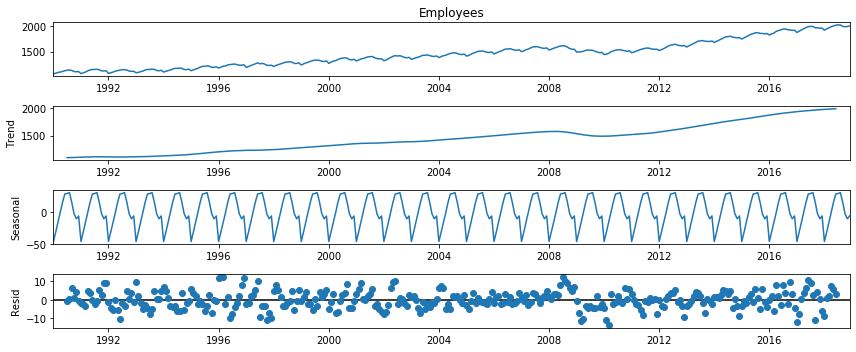

In [6]:
seasonal_decompose(df['Employees'],model='additive').plot();

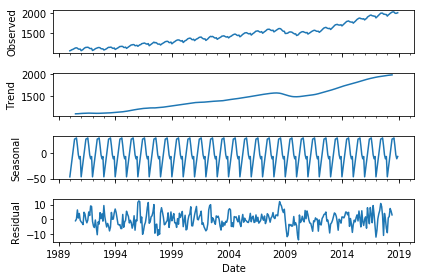

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [8]:
auto_arima(df['Employees'],seasonal=True,m=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  348
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1360.484
Date:                Sun, 12 Jul 2020   AIC                           2734.969
Time:                        23:23:46   BIC                           2761.914
Sample:                             0   HQIC                          2745.697
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7014      0.131      5.337      0.000       0.444       0.959
ar.L1          1.7316      0.001   1329.158      0.000       1.729       1.734
ar.L2         -0.9998      0.001  -1777.587      0.000      -1.001      -0.999
ma.L1         -2.1871      0.043    -50.402      0.000      -2.272      -2.102
ma.L2          1.8041      0.075     23.980      0.000       1.657       1.952
ma.L3         -0.4704      0.043    -10.934      0.000      -0.555      -0.386
sigma2       145.6796     10.765     13.533      0.000     124.580     166.779
===================================================================================
Ljung-Box (Q):                      778.33   Jarque-Bera (JB):                65.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.77
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [10]:
train = df.iloc[:336]
test = df.iloc[336:]

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [14]:
model = SARIMAX(train['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12),seasonal=True)

In [15]:
fitt = model.fit()

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [19]:
test_predictions = fitt.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False,typ='levels').rename('SARIMA Test Predictions')

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

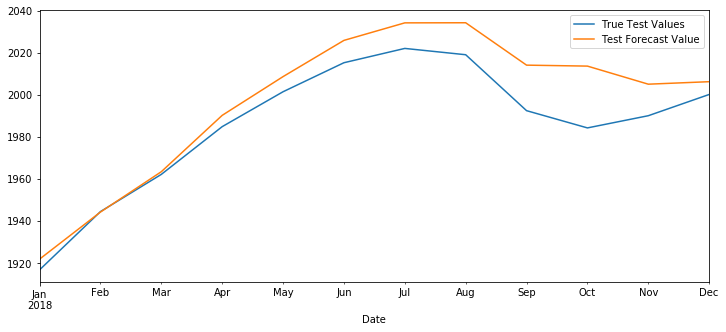

In [21]:
test['Employees'].plot(legend=True,label='True Test Values')
test_predictions.plot(legend=True,label='Test Forecast Value')

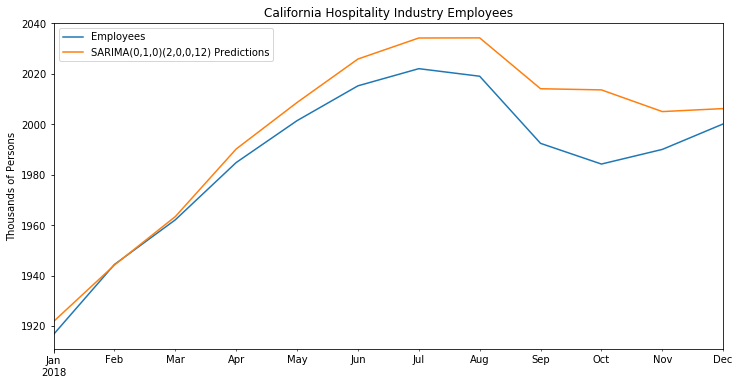

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [23]:
mse =  mean_squared_error(test['Employees'],test_predictions)
rmse = np.sqrt(mse)

print (f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse:11.10}')
print (f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506623
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222845


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [25]:
model = SARIMAX(df['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12),seasonal=True)

In [26]:
fitt = model.fit()

In [28]:
predictions = fitt.predict(start=len(df),end=len(df)+12,dynamic=False,typ='levels').rename('Forecasted Values')

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

In [ ]:
df['Employees'].plot(legend=True,label='Historical Data')
df['Employees'].plot(legend=True,label='')

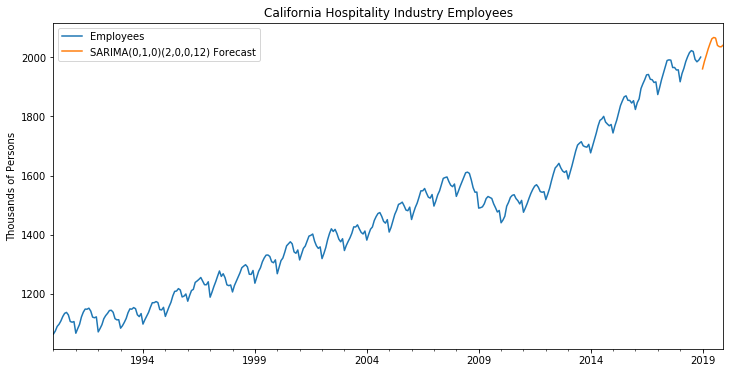

In [11]:
# DON'T WRITE HERE

## Great job!